In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

print(df.columns)
df

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [2]:
df = df[["Country", "EdLevel", "Employment", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Compensation"}, axis = 1)
df.head()

,Country,EdLevel,Employment,YearsCodePro,Compensation
0,Slovakia,"Secondary school (e.g. American high school, G...","Independent contractor, freelancer, or self-em...",NaN,62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time",NaN,NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time",NaN,NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",10,NaN


In [3]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
Employment      0
YearsCodePro    0
Compensation    0
dtype: int64

In [4]:
df.query('Country == "United States of America"').Country.count()
df.columns.get_loc("Country")

0

In [5]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [6]:
country_map = shorten_categories(df.Country.value_counts(),600)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()


Other                                                   15020
United States of America                                 9800
India                                                    3750
Germany                                                  3221
United Kingdom of Great Britain and Northern Ireland     2915
Canada                                                   1721
France                                                   1619
Brazil                                                   1572
Poland                                                   1106
Netherlands                                              1052
Spain                                                    1027
Australia                                                 948
Italy                                                     917
Russian Federation                                        871
Sweden                                                    820
Name: Country, dtype: int64

In [7]:
df = df[df['Employment'] == 'Employed full-time']
df = df.drop("Employment", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Compensation  40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [8]:
column = df['Compensation']
column.max()

30468516.0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Italy'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Poland'),
  Text(11, 0, 'Russian Federation'),
  Text(12, 0, 'Spain'),
  Text(13, 0, 'Sweden'),
  Text(14, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(15, 0, 'United States of America')])

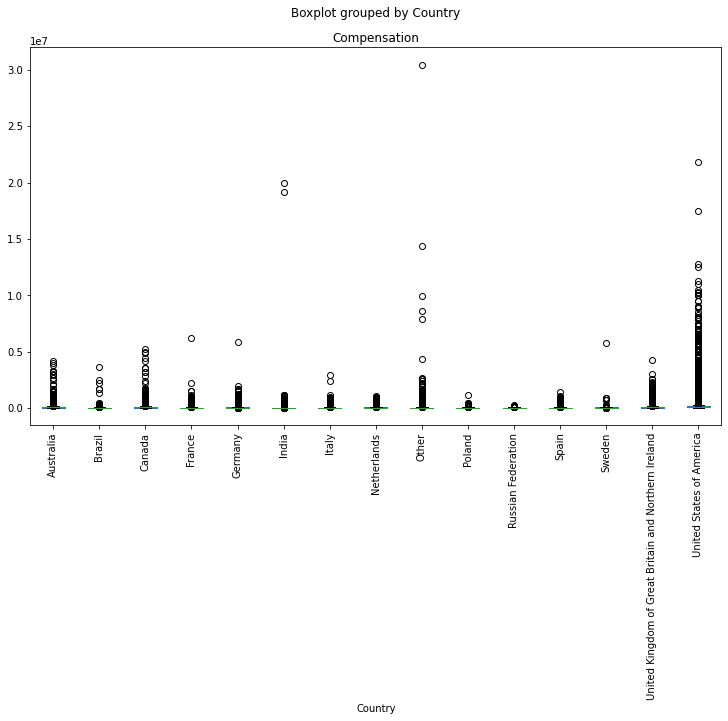

In [9]:
df.boxplot(by ='Country', column =['Compensation'], grid = False, figsize = (12, 7))
plt.xticks(rotation = 90)

In [10]:
index_names = df[ df['Compensation'] >= 1000000].index
df.drop(index_names, inplace = True)

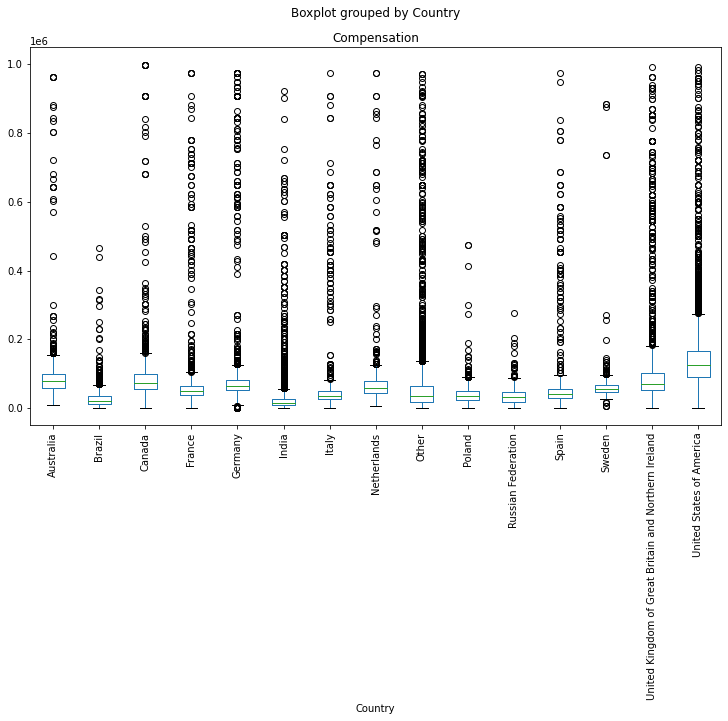

In [11]:
df.boxplot(by ='Country', column =['Compensation'], grid = False, figsize = (12, 7))
plt.xticks(rotation = 90)
plt.show()

In [12]:
df = df[df["Compensation"] <= 250000]
df = df[df["Compensation"] >= 10000]
df = df[df["Country"] != "Other"]

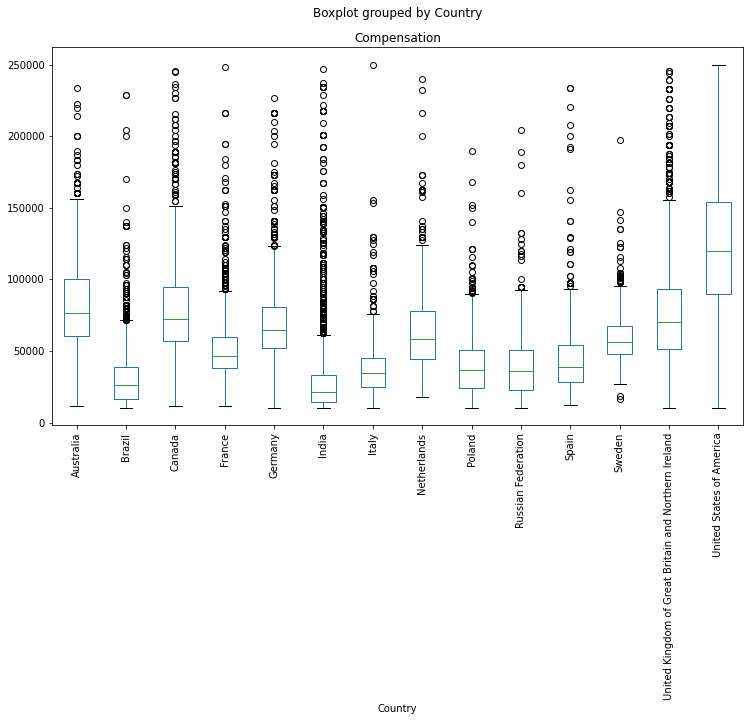

In [13]:
df.boxplot(by ='Country', column =['Compensation'], grid = False, figsize = (12, 7))
plt.xticks(rotation = 90)
plt.show()

In [14]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [15]:
  def clean_education(x):
        if 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' in x:
            return "Bachelor's degree"
        if 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' in x:
            return "Master's degree"
        if 'Professional degree (JD, MD, etc.)' in x or 'Other doctoral degree (Ph.D., Ed.D., etc.)' in x:
            return "Post grad"
        else:
            return "Less than a Bachelors'"

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [16]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", 'Post grad',
       "Less than a Bachelors'"], dtype=object)

In [17]:
df

,Country,EdLevel,YearsCodePro,Compensation
9,Sweden,Master's degree,4,51552.0
11,Spain,Bachelor's degree,5,46482.0
12,Germany,Master's degree,6,77290.0
17,Canada,Bachelor's degree,6,46135.0
23,France,Master's degree,2,38915.0
...,...,...,...,...
83430,United States of America,Master's degree,21,125000.0
83432,Canada,Bachelor's degree,Less than 1 year,80169.0
83434,United States of America,Bachelor's degree,5,160500.0
83436,United States of America,Less than a Bachelors',4,90000.0


In [18]:
df['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '34', '11', '25', '24',
       '22', '13', '9', '26', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [19]:
def clean_YearsCodePro(y):
    if y == 'Less than 1 year':
        return 0.5
    if y == 'More than 50 years':
        return 50
    return float(y)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_YearsCodePro)

In [20]:
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 34. , 11. , 25. , 24. , 22. , 13. ,
        9. , 26. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [21]:
from sklearn.preprocessing import LabelEncoder

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [22]:
df

,Country,EdLevel,YearsCodePro,Compensation
9,11,2,4.0,51552.0
11,10,0,5.0,46482.0
12,4,2,6.0,77290.0
17,2,0,6.0,46135.0
23,3,2,2.0,38915.0
...,...,...,...,...
83430,13,2,21.0,125000.0
83432,2,0,0.5,80169.0
83434,13,0,5.0,160500.0
83436,13,1,4.0,90000.0


In [23]:
x = df.drop("Compensation", axis=1)
y = df["Compensation"]

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(x, y)

GradientBoostingRegressor(random_state=0)

In [26]:
y_pred = regressor.predict(x)

error = np.sqrt(mean_squared_error(y, y_pred))

print(error)

32744.22868715262


In [27]:
import pickle

myVar = {"model": regressor, "le_country": le_country, "le_education": le_education}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(myVar, file)

In [28]:
df.Country.value_counts()

13    8276
4     2611
12    2372
5     2206
2     1487
3     1309
1     1134
10     820
7      809
0      774
8      756
11     724
6      689
9      680
Name: Country, dtype: int64